In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
file1 = 'D:\\Data Science\\title.basics.csv'
file2 = 'D:\\Data Science\\title.ratings.csv'

basics = pd.read_csv(file1,sep=',')
ratings = pd.read_csv(file2,sep=',')


In [251]:
basics.head()
basics.info()
basics.shape

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [219]:
ratings.head()
ratings.info()
ratings.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510526 entries, 0 to 1510525
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1510526 non-null  object 
 1   averageRating  1510526 non-null  float64
 2   numVotes       1510526 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 34.6+ MB


(1510526, 3)

In [220]:
mergedFile = pd.merge(basics, ratings, on='tconst', how='inner')
mergedFile.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,2108
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.6,284
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance",6.5,2132
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.3,182
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2860


In [221]:
mergedFile.info()
mergedFile.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473910 entries, 0 to 473909
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          473910 non-null  object 
 1   titleType       473910 non-null  object 
 2   primaryTitle    473910 non-null  object 
 3   originalTitle   473910 non-null  object 
 4   isAdult         473910 non-null  int64  
 5   startYear       473910 non-null  object 
 6   endYear         473910 non-null  object 
 7   runtimeMinutes  473910 non-null  object 
 8   genres          473910 non-null  object 
 9   averageRating   473910 non-null  float64
 10  numVotes        473910 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 39.8+ MB


(473910, 11)

In [222]:
mergedFile.to_csv('D:\\Data Science\\Output File.csv', index=False)
print("Merg of Data is Done ")
print(mergedFile)

Merg of Data is Done 
            tconst  titleType                  primaryTitle  \
0        tt0000001      short                    Carmencita   
1        tt0000002      short        Le clown et ses chiens   
2        tt0000003      short                  Poor Pierrot   
3        tt0000004      short                   Un bon bock   
4        tt0000005      short              Blacksmith Scene   
...            ...        ...                           ...   
473905  tt10146586      movie    Minecraft: Into the Nether   
473906   tt1014659  tvEpisode           The Art of the Duel   
473907   tt1014660  tvEpisode                The Dark Light   
473908   tt1014661  tvEpisode           The Darkness Within   
473909   tt1014662  tvEpisode  The Hands of Justice: Part 1   

                       originalTitle  isAdult startYear endYear  \
0                         Carmencita        0      1894      \N   
1             Le clown et ses chiens        0      1892      \N   
2                   

In [223]:
mergedFile = mergedFile.drop('endYear', axis=1)


In [224]:
nullValue = mergedFile.isnull().sum()
print(nullValue)

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
dtype: int64


In [225]:
mergedFile.replace('\\N', pd.NA, inplace=True)

In [226]:
mergedFile['startYear'] = pd.to_numeric(mergedFile['startYear'], errors='coerce')
mergedFile['runtimeMinutes'] = pd.to_numeric(mergedFile['runtimeMinutes'], errors='coerce')


In [227]:

mergedFile = mergedFile.dropna(subset=['startYear', 'runtimeMinutes'])

In [228]:
mergedFile.describe()

,isAdult,startYear,runtimeMinutes,averageRating,numVotes
count,383258.000000,383258.000000,383258.000000,383258.000000,3.832580e+05
mean,0.030178,1982.752008,63.002317,6.662543,2.007243e+03
std,0.171077,22.449712,47.690905,1.263928,2.820157e+04
min,0.000000,1888.000000,0.000000,1.000000,5.000000e+00
25%,0.000000,1969.000000,29.000000,5.900000,2.100000e+01
50%,0.000000,1989.000000,60.000000,6.800000,5.800000e+01
75%,0.000000,2001.000000,90.000000,7.600000,2.080000e+02
max,1.000000,2024.000000,5220.000000,10.000000,2.974468e+06


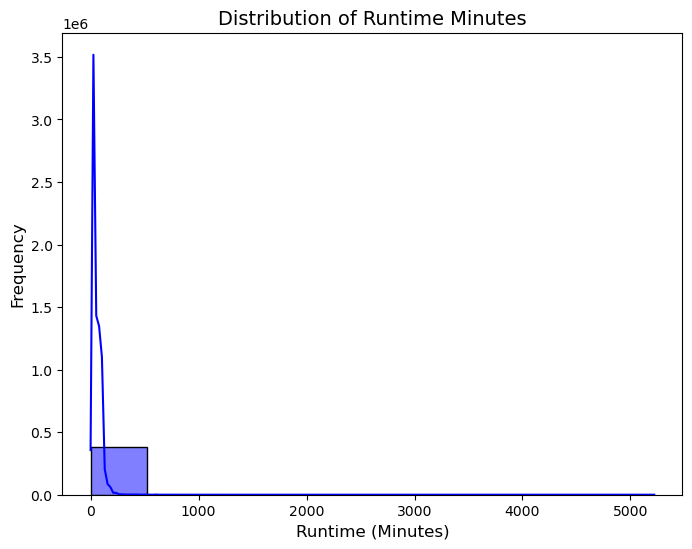

C:\Users\DELL\AppData\Local\Temp\ipykernel_5928\908898111.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mergedFile_exploded, y='genres', order=mergedFile_exploded['genres'].value_counts().index, palette="viridis")


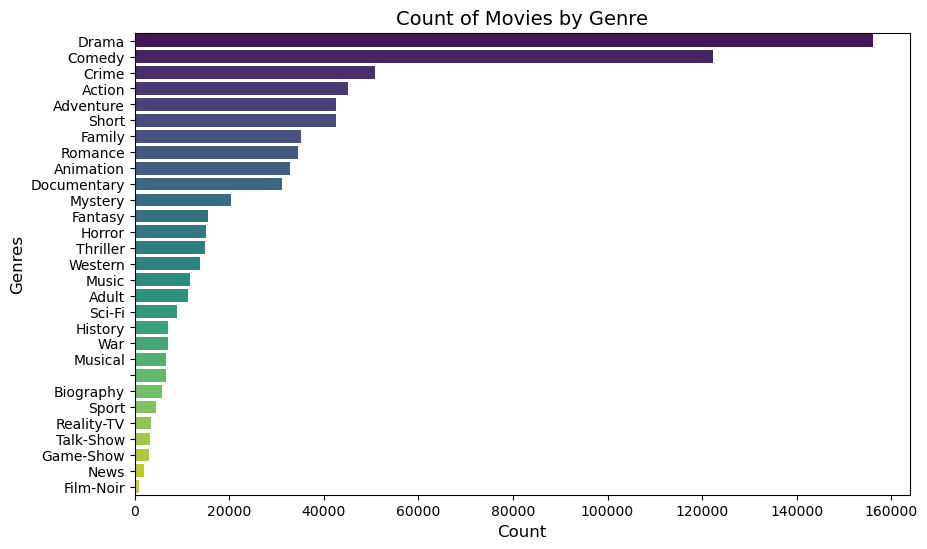

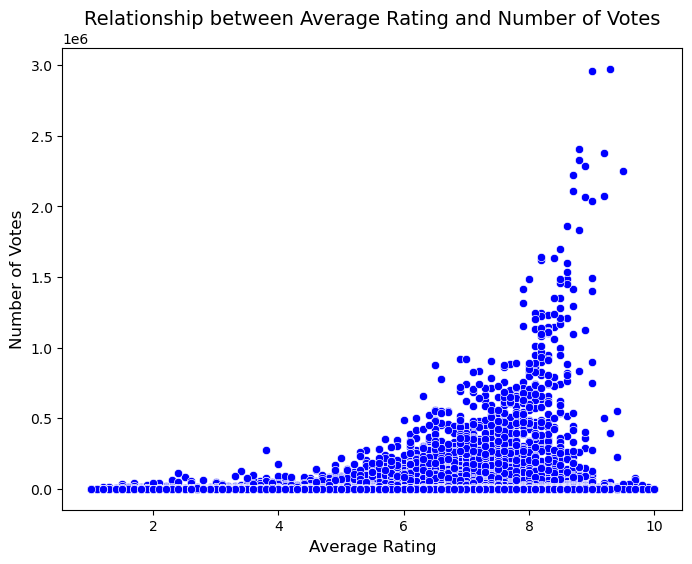

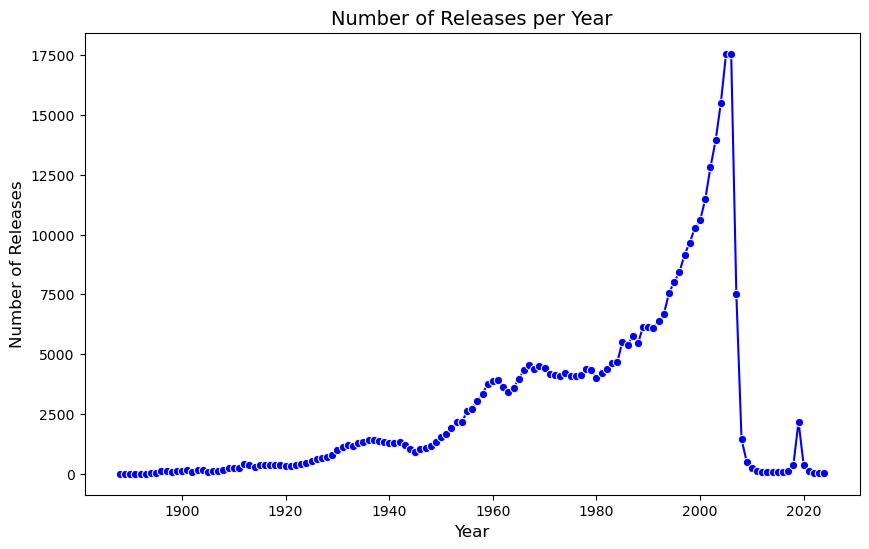

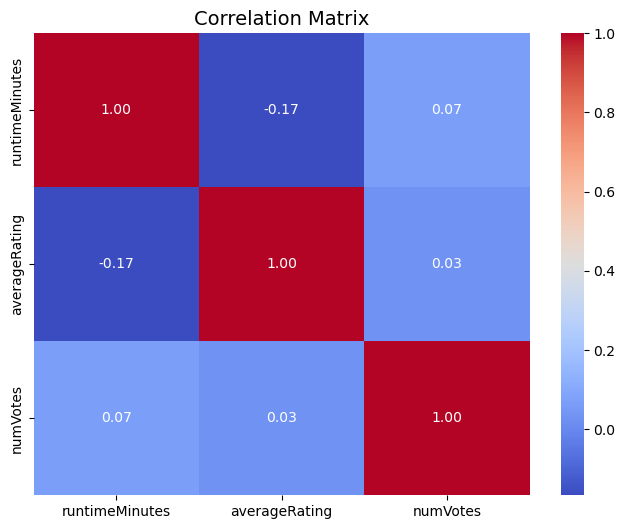

In [299]:
mergedFile_exploded = mergedFile.assign(genres=mergedFile['genres'].str.split(',')).explode('genres')

plt.figure(figsize=(8, 6))
sns.histplot(mergedFile['runtimeMinutes'], kde=True, bins=10, color="blue")
plt.title("Distribution of Runtime Minutes", fontsize=14)
plt.xlabel("Runtime (Minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=mergedFile_exploded, y='genres', order=mergedFile_exploded['genres'].value_counts().index, palette="viridis")
plt.title("Count of Movies by Genre", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=mergedFile, x='averageRating', y='numVotes', color="blue")
plt.title("Relationship between Average Rating and Number of Votes", fontsize=14)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Number of Votes", fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
mergedFile['startYear'] = mergedFile['startYear'].astype(int)
releases_per_year = mergedFile['startYear'].value_counts().sort_index()
sns.lineplot(x=releases_per_year.index, y=releases_per_year.values, marker='o', color="blue")
plt.title("Number of Releases per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Releases", fontsize=12)
plt.show()

plt.figure(figsize=(8, 6))
correlation_matrix = mergedFile[['runtimeMinutes', 'averageRating', 'numVotes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=14)
plt.show()


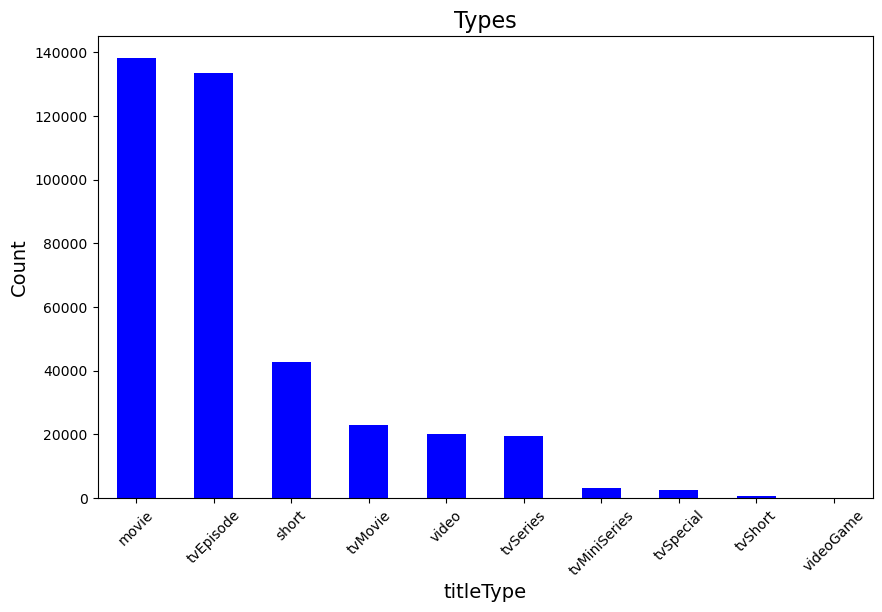

In [229]:
typsOfShows = mergedFile['titleType'].value_counts()
plt.figure(figsize=(10, 6))
typsOfShows.plot(kind='bar', color='blue')
plt.title('Types', fontsize=16)
plt.xlabel('titleType', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

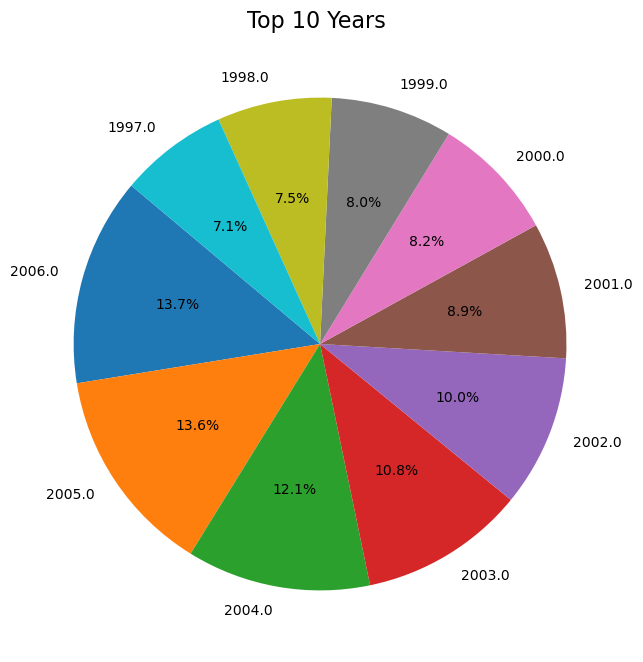

In [230]:
topYears = mergedFile['startYear'].value_counts().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(topYears, labels=topYears.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Top 10 Years ', fontsize=16)
plt.show()

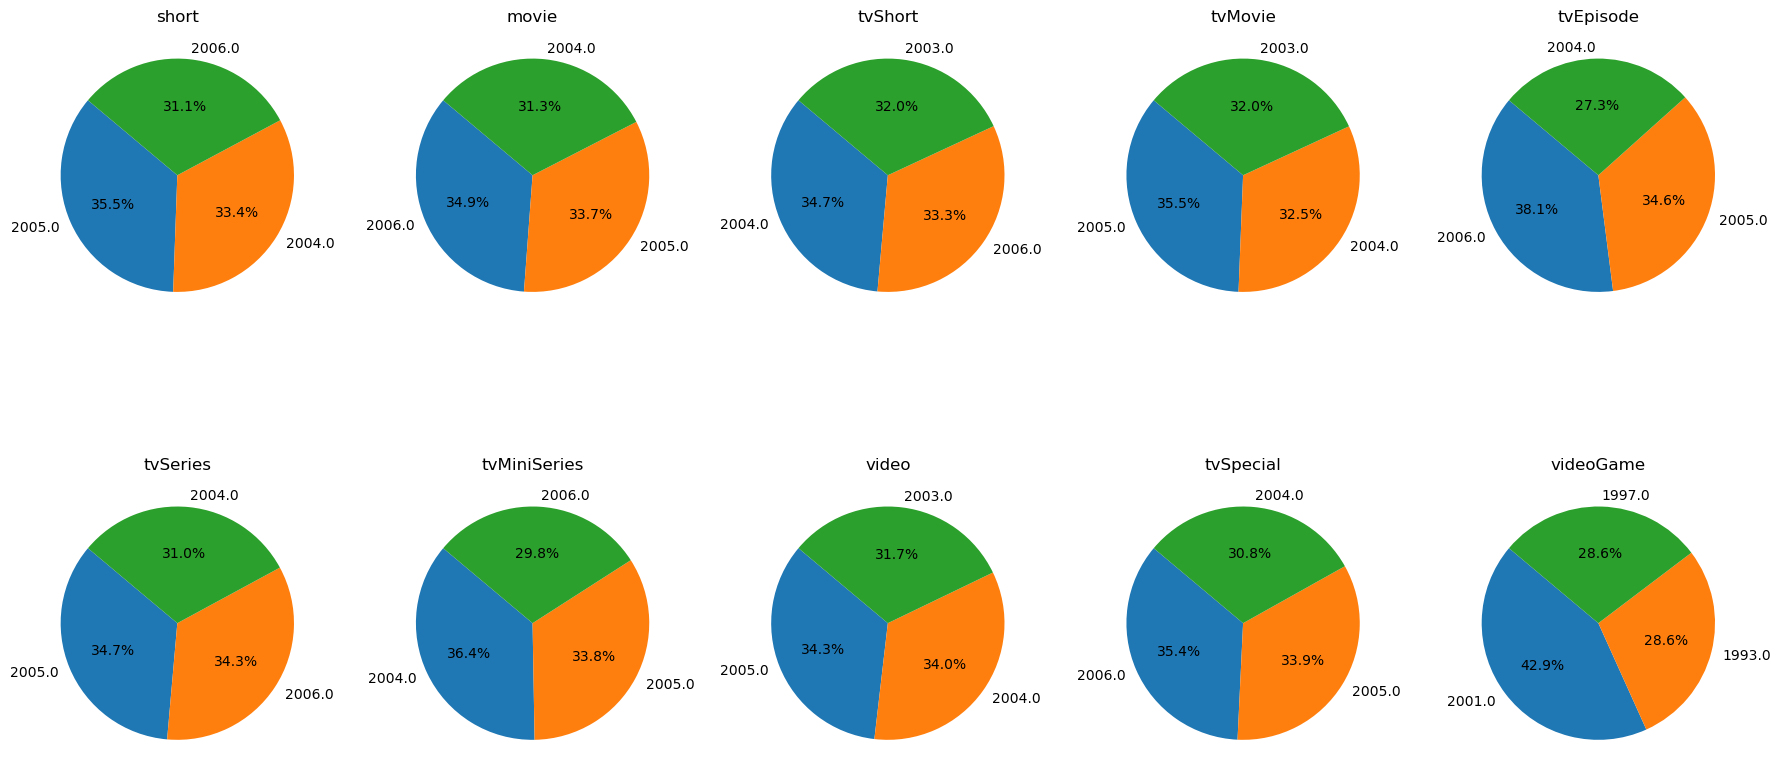

In [231]:
typs = mergedFile['titleType'].unique()[:10]
plt.figure(figsize=(18, 10))
plt.subplot(2, 5, 1)

yearCounts = mergedFile[mergedFile['titleType'] == typs[0]]['startYear'].value_counts().nlargest(3)
plt.pie(yearCounts, labels=yearCounts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title(typs[0])

plt.subplot(2, 5, 2)
yearCounts = mergedFile[mergedFile['titleType'] == typs[1]]['startYear'].value_counts().nlargest(3)
plt.pie(yearCounts, labels=yearCounts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title(typs[1])

plt.subplot(2, 5, 3)
yearCounts = mergedFile[mergedFile['titleType'] == typs[2]]['startYear'].value_counts().nlargest(3)
plt.pie(yearCounts, labels=yearCounts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title(typs[2])

plt.subplot(2, 5, 4)
yearCounts = mergedFile[mergedFile['titleType'] == typs[3]]['startYear'].value_counts().nlargest(3)
plt.pie(yearCounts, labels=yearCounts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title(typs[3])
plt.subplot(2, 5, 5)
yearCounts = mergedFile[mergedFile['titleType'] == typs[4]]['startYear'].value_counts().nlargest(3)
plt.pie(yearCounts, labels=yearCounts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title(typs[4])

plt.subplot(2, 5, 6)
yearCounts = mergedFile[mergedFile['titleType'] == typs[5]]['startYear'].value_counts().nlargest(3)
plt.pie(yearCounts, labels=yearCounts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title(typs[5])

plt.subplot(2, 5, 7)
yearCounts = mergedFile[mergedFile['titleType'] == typs[6]]['startYear'].value_counts().nlargest(3)
plt.pie(yearCounts, labels=yearCounts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title(typs[6])

plt.subplot(2, 5, 8)
yearCounts = mergedFile[mergedFile['titleType'] == typs[7]]['startYear'].value_counts().nlargest(3)
plt.pie(yearCounts, labels=yearCounts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title(typs[7])

plt.subplot(2, 5, 9)
yearCounts = mergedFile[mergedFile['titleType'] == typs[8]]['startYear'].value_counts().nlargest(3)
plt.pie(yearCounts, labels=yearCounts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title(typs[8])

plt.subplot(2, 5, 10)
yearCounts = mergedFile[mergedFile['titleType'] == typs[9]]['startYear'].value_counts().nlargest(3)
plt.pie(yearCounts, labels=yearCounts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title(typs[9])

plt.tight_layout()
plt.show()


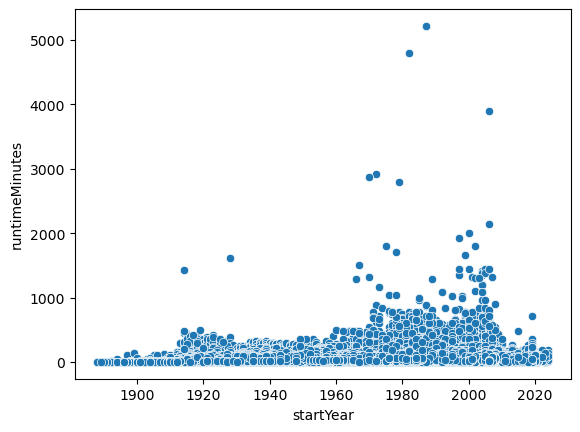

In [232]:
sns.scatterplot(x=mergedFile['startYear'], y=mergedFile['runtimeMinutes'])
plt.show()

In [255]:
mergedFile.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,1.0,"Documentary,Short",5.7,2108
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,5.0,"Animation,Short",5.6,284
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892.0,5.0,"Animation,Comedy,Romance",6.5,2132
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,12.0,"Animation,Short",5.3,182
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,1.0,"Comedy,Short",6.2,2860


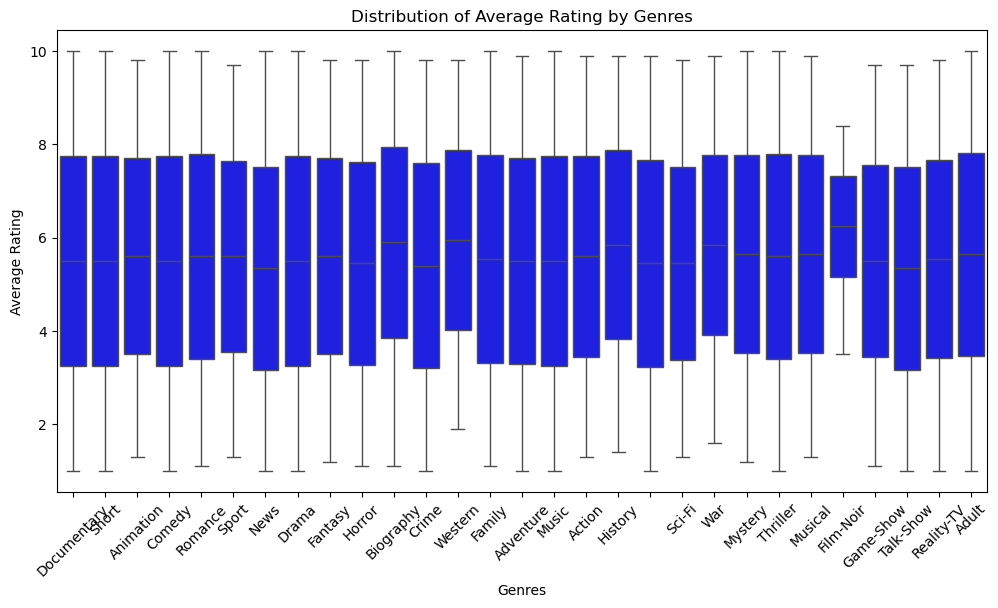

In [285]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=exploded_data, 
    x='genres', 
    y='averageRating', 
    color='blue'
)
plt.xticks(rotation=45)
plt.title('Distribution of Average Rating by Genres')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.show()

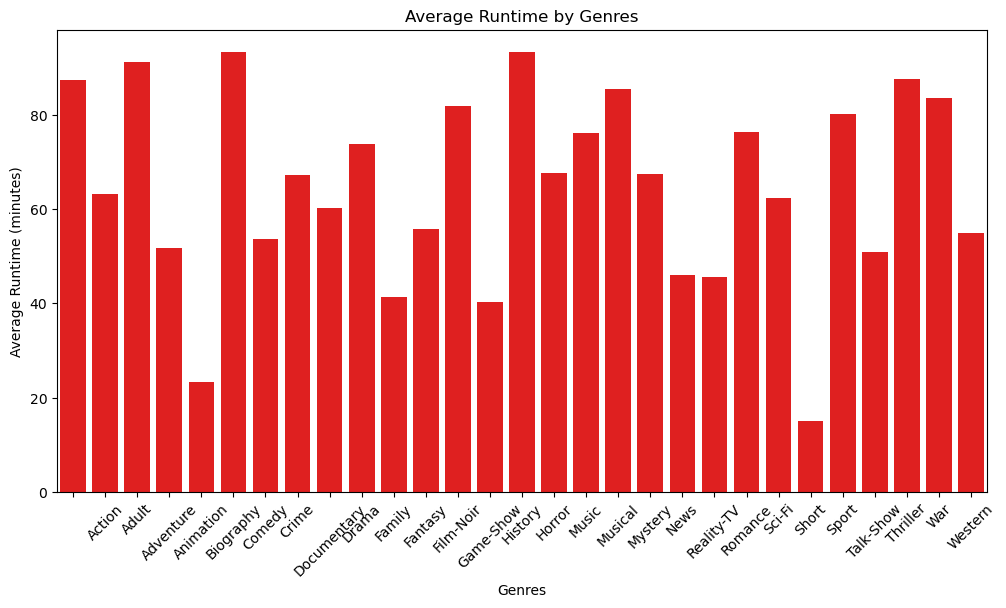

In [283]:
plt.figure(figsize=(12, 6))
genre_runtime = mergedFile['genres'].str.split(',').explode()
genre_runtime = mergedFile.loc[genre_runtime.index, 'runtimeMinutes'].groupby(genre_runtime).mean()
sns.barplot(x=genre_runtime.index, y=genre_runtime.values, color='red')
plt.title('Average Runtime by Genres')
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Average Runtime (minutes)')
plt.show()

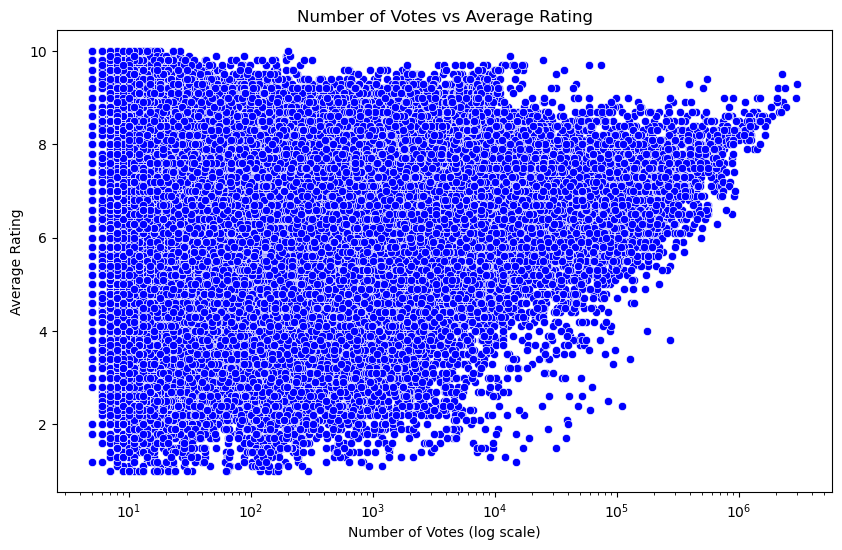

In [291]:
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x=mergedFile['numVotes'], y=mergedFile['averageRating'], alpha=1, color='blue')
#plt.xscale('log')  # عدد الاصوات كبير 
#plt.title('Number of Votes vs Average Rating')
#plt.xlabel('Number of Votes (log scale)')
#plt.ylabel('Average Rating')
#plt.show()


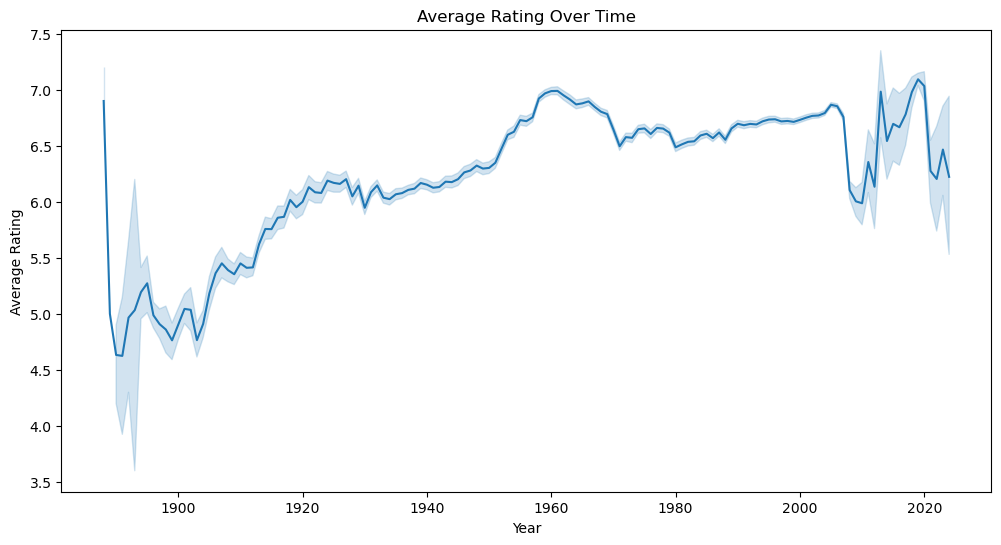

In [293]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=mergedFile, x='startYear', y='averageRating')
plt.title('Average Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


In [295]:
mergedFile.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,1.0,"Documentary,Short",5.7,2108
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,5.0,"Animation,Short",5.6,284
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892.0,5.0,"Animation,Comedy,Romance",6.5,2132
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,12.0,"Animation,Short",5.3,182
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,1.0,"Comedy,Short",6.2,2860
